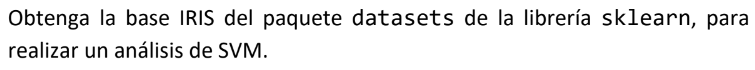

In [3]:
# obtener iris dataset de sklearn a dataframe
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


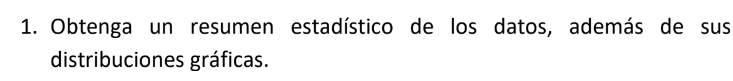

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


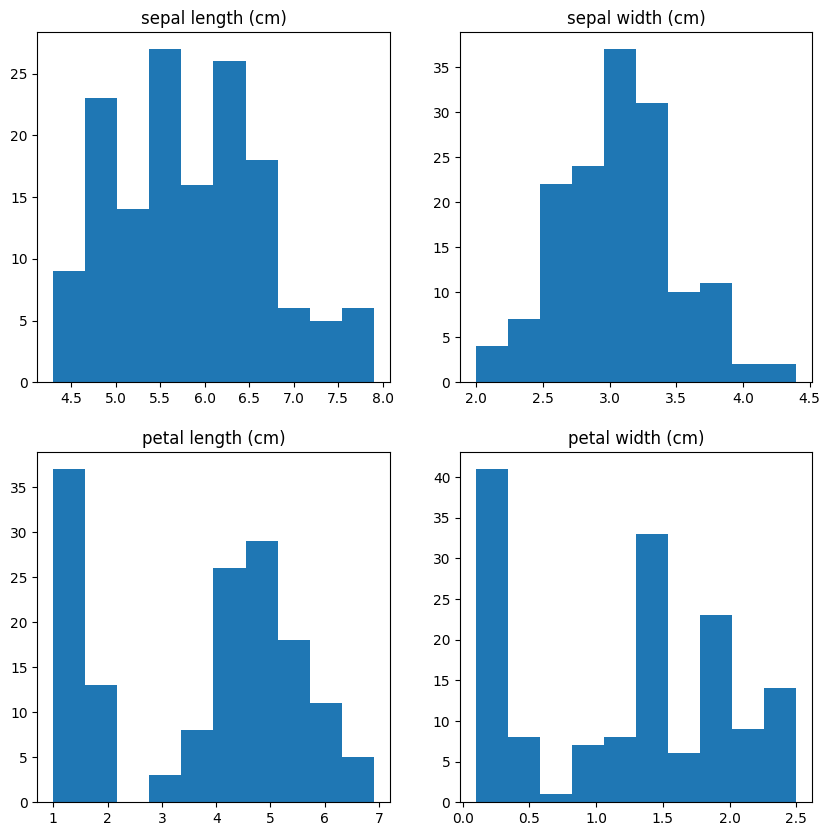

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df['sepal length (cm)'])
axs[0, 0].set_title('sepal length (cm)')
axs[0, 1].hist(df['sepal width (cm)'])
axs[0, 1].set_title('sepal width (cm)')
axs[1, 0].hist(df['petal length (cm)'])
axs[1, 0].set_title('petal length (cm)')
axs[1, 1].hist(df['petal width (cm)'])
axs[1, 1].set_title('petal width (cm)')
plt.show()

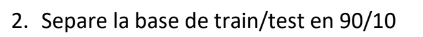

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.1, random_state=42)

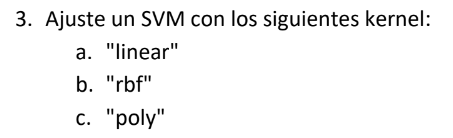

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [9]:
# Generar svm con kernel lineal
svm_lineal = SVC(kernel='linear')

# Generar svm con kernel rbf
svm_rbf = SVC(kernel='rbf')

# Generar svm con kernel polinomial
svm_poly = SVC(kernel='poly')

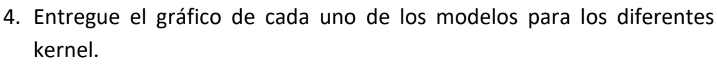

In [10]:
# Fit de los modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [11]:
# Obtener predicciones 
y_pred_lineal = svm_lineal.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


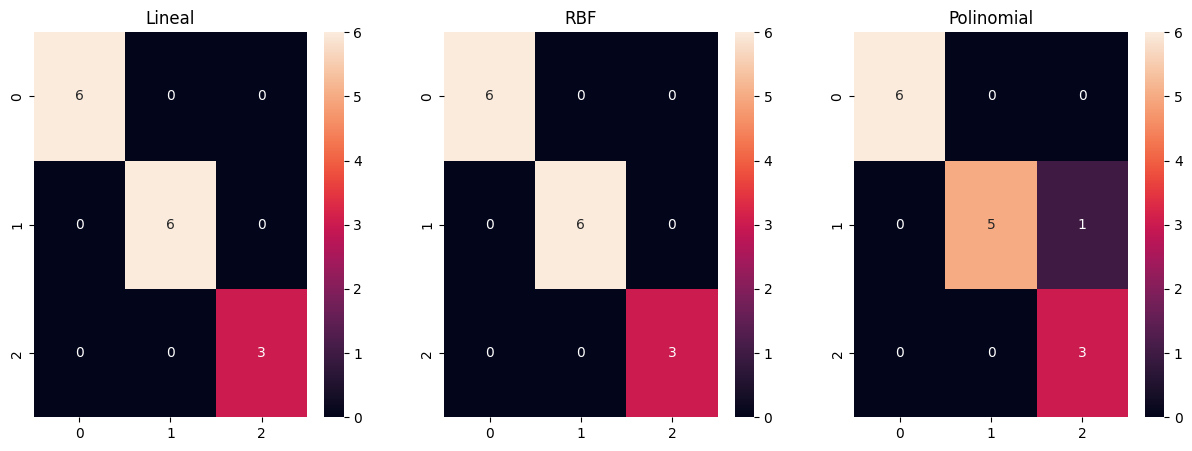

In [12]:
import seaborn as sns

matriz_lineal = confusion_matrix(y_test, y_pred_lineal)
matriz_rbf = confusion_matrix(y_test, y_pred_rbf)
matriz_poly = confusion_matrix(y_test, y_pred_poly)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(matriz_lineal, annot=True, ax=axs[0])
axs[0].set_title('Lineal')
sns.heatmap(matriz_rbf, annot=True, ax=axs[1])
axs[1].set_title('RBF')
sns.heatmap(matriz_poly, annot=True, ax=axs[2])
axs[2].set_title('Polinomial')
plt.show()

In [13]:
X = iris.data[:,:4]
y = iris.target

# Modelo con Kernel Lineal

In [14]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
v_min, v_max = X[:, 1].min() - 1, X[:, 1].max() + 1
w_min, w_max = X[:, 2].min() - 1, X[:, 2].max() + 1
z_min, z_max = X[:, 3].min() - 1, X[:, 3].max() + 1


xx, vv, ww, zz = np.meshgrid(
    np.arange(x_min, x_max, 0.5),
    np.arange(v_min, v_max, 0.5),
    np.arange(w_min, w_max, 0.5),
    np.arange(z_min, z_max, 0.5)
)


In [28]:
# Make predictions on the meshgrid points
Z = svm_lineal.predict(np.c_[xx.ravel(),vv.ravel(),ww.ravel(),zz.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
Z.shape , xx.shape, vv.shape,ww.shape,zz.shape

((9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9))

In [30]:
Z_x_w = Z[:,0,:,0]
Z_x_v = Z[:,:,0,0]
Z_x_z = Z[:,0,0,:]
Z_v_w = Z[0,:,:,0]
Z_w_z = Z[0,0,:,:]
Z_v_z = Z[0,:,0,:]

Text(0.5, 0.98, 'SVM Lineal')

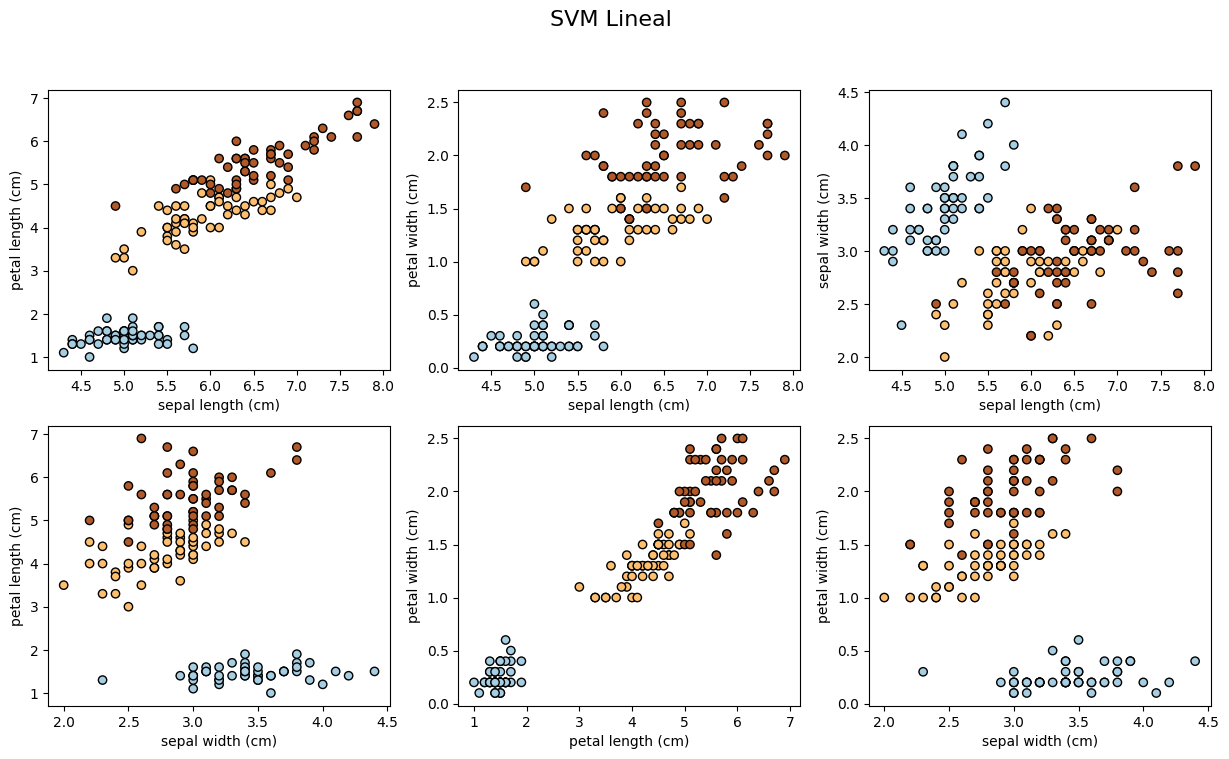

In [42]:
# Plot the decision boundary
fig, axs = plt.subplots(2,3,figsize=(15,8))


#axs[0,0].contourf(xx[:,0,:,0], ww[:,0,:,0], Z_x_w, cmap=plt.cm.Paired, alpha=0.8)
axs[0,0].scatter(
    X[:, 0], X[:, 2],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,0].set_xlabel('sepal length (cm)')
axs[0,0].set_ylabel('petal length (cm)')


#axs[0,1].contourf(xx[:,0,0,:], zz[:,0,0,:], Z_x_z, cmap=plt.cm.Paired, alpha=0.8)
axs[0,1].scatter(
    X[:, 0], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,1].set_xlabel('sepal length (cm)')
axs[0,1].set_ylabel('petal width (cm)')

#axs[0,2].contourf(xx[:,:,0,0], vv[:,:,0,0], Z_x_v, cmap=plt.cm.Paired, alpha=0.8)
axs[0,2].scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,2].set_xlabel('sepal length (cm)')
axs[0,2].set_ylabel('sepal width (cm)')

#axs[1,0].contourf(ww[0,:,:,0], vv[0,:,:,0], Z_v_w, cmap=plt.cm.Paired, alpha=0.8)
axs[1,0].scatter(
    X[:, 1], X[:, 2],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,0].set_xlabel('sepal width (cm)')
axs[1,0].set_ylabel('petal length (cm)')


#axs[1,1].contourf(ww[0,0,:,:], zz[0,0,:,:], Z_w_z, cmap=plt.cm.Paired, alpha=0.8)
axs[1,1].scatter(
    X[:, 2], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,1].set_xlabel('petal length (cm)')
axs[1,1].set_ylabel('petal width (cm)')

#axs[1,2].contourf(vv[0,:,0,:], zz[0,:,0,:], Z_v_z, cmap=plt.cm.Paired, alpha=0.8)
axs[1,2].scatter(
    X[:, 1], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,2].set_xlabel('sepal width (cm)')
axs[1,2].set_ylabel('petal width (cm)')

# poner titulo a la figura
fig.suptitle('SVM Lineal', fontsize=16)

In [32]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

# Modelo con Kernel RBF

In [19]:
# Make predictions on the meshgrid points
Z = svm_rbf.predict(np.c_[xx.ravel(),vv.ravel(),ww.ravel(),zz.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
Z.shape , xx.shape, vv.shape,ww.shape,zz.shape

((9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9))

In [21]:
Z_x_w = Z[:,0,:,0]
Z_x_v = Z[:,:,0,0]
Z_x_z = Z[:,0,0,:]
Z_v_w = Z[0,:,:,0]
Z_w_z = Z[0,0,:,:]
Z_v_z = Z[0,:,0,:]

Text(0.5, 0.98, 'SVM RBF')

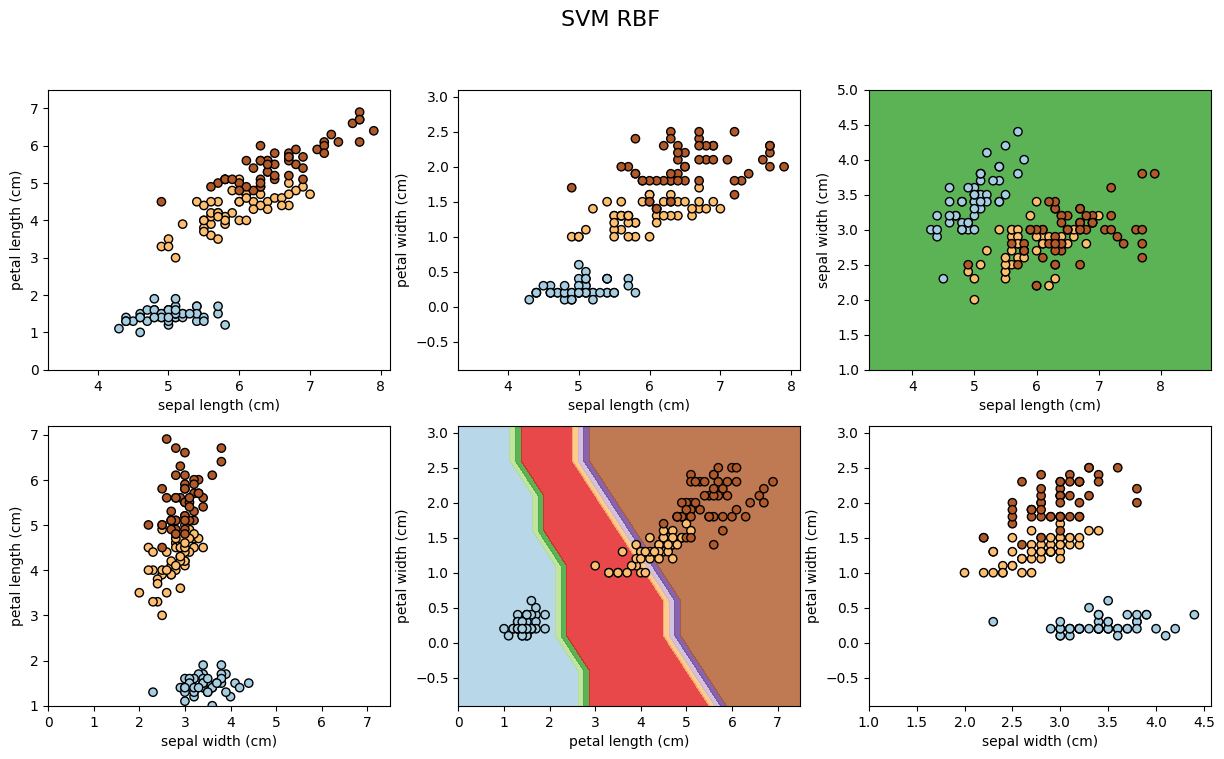

In [22]:
# Plot the decision boundary
fig, axs = plt.subplots(2,3,figsize=(15,8))

axs[0,0].contourf(xx[:,0,:,0], ww[:,0,:,0], Z_x_w, cmap=plt.cm.Paired, alpha=0.8)
axs[0,0].scatter(
    X[:, 0], X[:, 2],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,0].set_xlabel('sepal length (cm)')
axs[0,0].set_ylabel('petal length (cm)')


axs[0,1].contourf(xx[:,0,0,:], zz[:,0,0,:], Z_x_z, cmap=plt.cm.Paired, alpha=0.8)
axs[0,1].scatter(
    X[:, 0], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,1].set_xlabel('sepal length (cm)')
axs[0,1].set_ylabel('petal width (cm)')

axs[0,2].contourf(xx[:,:,0,0], vv[:,:,0,0], Z_x_v, cmap=plt.cm.Paired, alpha=0.8)
axs[0,2].scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,2].set_xlabel('sepal length (cm)')
axs[0,2].set_ylabel('sepal width (cm)')

axs[1,0].contourf(ww[0,:,:,0], vv[0,:,:,0], Z_v_w, cmap=plt.cm.Paired, alpha=0.8)
axs[1,0].scatter(
    X[:, 1], X[:, 2],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,0].set_xlabel('sepal width (cm)')
axs[1,0].set_ylabel('petal length (cm)')


axs[1,1].contourf(ww[0,0,:,:], zz[0,0,:,:], Z_w_z, cmap=plt.cm.Paired, alpha=0.8)
axs[1,1].scatter(
    X[:, 2], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,1].set_xlabel('petal length (cm)')
axs[1,1].set_ylabel('petal width (cm)')

axs[1,2].contourf(vv[0,:,0,:], zz[0,:,0,:], Z_v_z, cmap=plt.cm.Paired, alpha=0.8)
axs[1,2].scatter(
    X[:, 1], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,2].set_xlabel('sepal width (cm)')
axs[1,2].set_ylabel('petal width (cm)')

# poner titulo a la figura
fig.suptitle('SVM RBF', fontsize=16)

# Modelo con Kernel Polinomial

In [23]:
# Make predictions on the meshgrid points
Z = svm_poly.predict(np.c_[xx.ravel(),vv.ravel(),ww.ravel(),zz.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
Z.shape , xx.shape, vv.shape,ww.shape,zz.shape

((9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9),
 (9, 12, 16, 9))

In [25]:
Z_x_w = Z[:,0,:,0]
Z_x_v = Z[:,:,0,0]
Z_x_z = Z[:,0,0,:]
Z_v_w = Z[0,:,:,0]
Z_w_z = Z[0,0,:,:]
Z_v_z = Z[0,:,0,:]

Text(0.5, 0.98, 'SVM Poly')

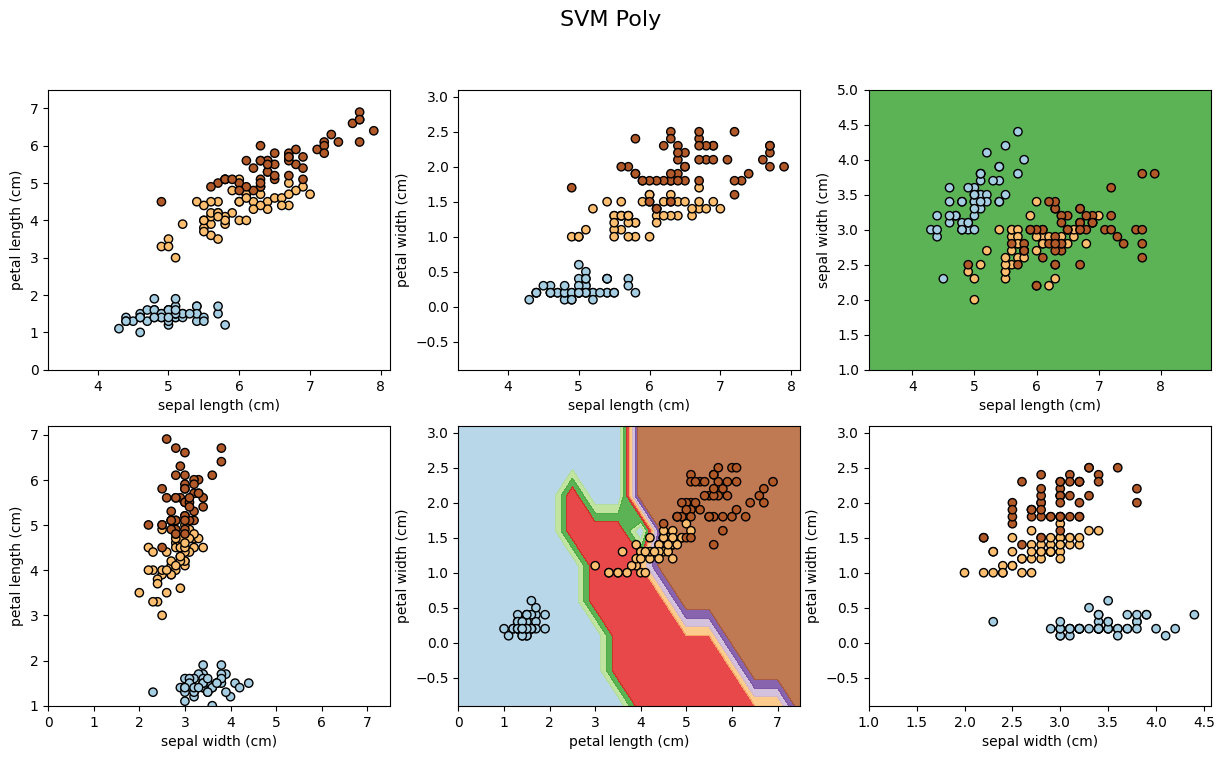

In [26]:
# Plot the decision boundary
fig, axs = plt.subplots(2,3,figsize=(15,8))

axs[0,0].contourf(xx[:,0,:,0], ww[:,0,:,0], Z_x_w, cmap=plt.cm.Paired, alpha=0.8)
axs[0,0].scatter(
    X[:, 0], X[:, 2],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,0].set_xlabel('sepal length (cm)')
axs[0,0].set_ylabel('petal length (cm)')


axs[0,1].contourf(xx[:,0,0,:], zz[:,0,0,:], Z_x_z, cmap=plt.cm.Paired, alpha=0.8)
axs[0,1].scatter(
    X[:, 0], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,1].set_xlabel('sepal length (cm)')
axs[0,1].set_ylabel('petal width (cm)')

axs[0,2].contourf(xx[:,:,0,0], vv[:,:,0,0], Z_x_v, cmap=plt.cm.Paired, alpha=0.8)
axs[0,2].scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[0,2].set_xlabel('sepal length (cm)')
axs[0,2].set_ylabel('sepal width (cm)')

axs[1,0].contourf(ww[0,:,:,0], vv[0,:,:,0], Z_v_w, cmap=plt.cm.Paired, alpha=0.8)
axs[1,0].scatter(
    X[:, 1], X[:, 2],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,0].set_xlabel('sepal width (cm)')
axs[1,0].set_ylabel('petal length (cm)')


axs[1,1].contourf(ww[0,0,:,:], zz[0,0,:,:], Z_w_z, cmap=plt.cm.Paired, alpha=0.8)
axs[1,1].scatter(
    X[:, 2], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,1].set_xlabel('petal length (cm)')
axs[1,1].set_ylabel('petal width (cm)')

axs[1,2].contourf(vv[0,:,0,:], zz[0,:,0,:], Z_v_z, cmap=plt.cm.Paired, alpha=0.8)
axs[1,2].scatter(
    X[:, 1], X[:, 3],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black'
)

# poner nombre a los ejes
axs[1,2].set_xlabel('sepal width (cm)')
axs[1,2].set_ylabel('petal width (cm)')

# poner titulo a la figura
fig.suptitle('SVM Poly', fontsize=16)